#                                      TITANIC SURVIVAL PREDICTION

Importing of Libraries

In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

Reading and viewing the DataFrame

In [2]:
df = pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Explorartory Data Analysis (EDA)

In [5]:
# Summary Statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


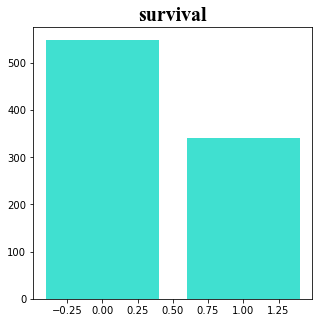

In [6]:
plt.figure(figsize=(5,5))
plt.bar(list(df['Survived'].value_counts().keys()),list(df['Survived'].value_counts()),color="turquoise")
plt.title("survival",fontname="Times New Roman", size=20,fontweight="bold")
plt.show()

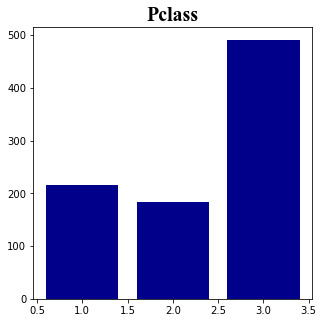

In [7]:
plt.figure(figsize=(5,5))
plt.bar(list(df['Pclass'].value_counts().keys()),list(df['Pclass'].value_counts()),color="darkblue")
plt.title("Pclass",fontname="Times New Roman", size=20,fontweight="bold")
plt.show()

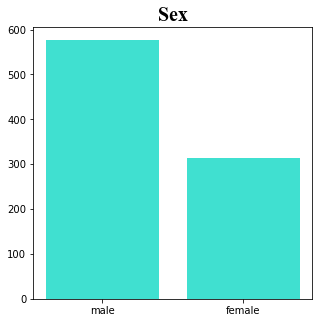

In [8]:
plt.figure(figsize=(5,5))
plt.bar(list(df['Sex'].value_counts().keys()),list(df['Sex'].value_counts()),color="turquoise")
plt.title("Sex",fontname="Times New Roman", size=20,fontweight="bold")
plt.show()

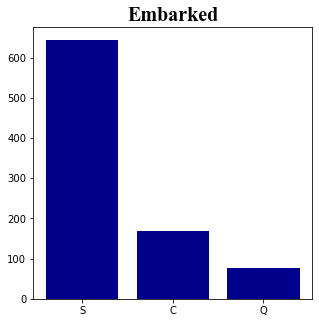

In [9]:
plt.figure(figsize=(5,5))
plt.bar(list(df['Embarked'].value_counts().keys()),list(df['Embarked'].value_counts()),color="darkblue")
plt.title("Embarked",fontname="Times New Roman", size=20,fontweight="bold")
plt.show()

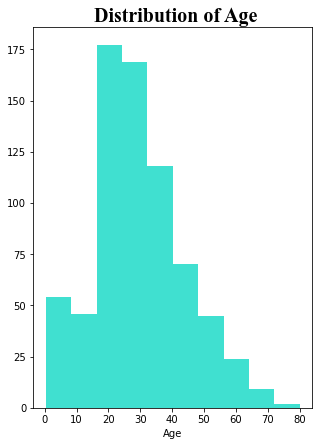

In [10]:
plt.figure(figsize=(5,7))
plt.hist(df['Age'],color="turquoise")
plt.title(" Distribution of Age",fontname="Times New Roman", size=20,fontweight="bold")
plt.xlabel("Age")
plt.show()

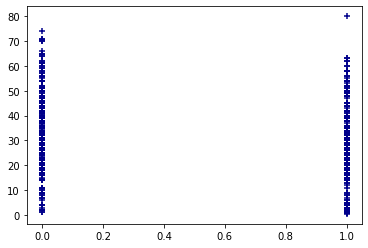

In [11]:
plt.scatter(df['Survived'],df['Age'],marker='+',color='darkblue')

<AxesSubplot:xlabel='Survived', ylabel='count'>

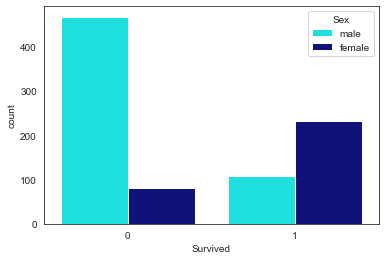

In [15]:
sns.set_style('white')
sns.countplot(x='Survived',hue='Sex',data=df,palette=['aqua','darkblue'])

<AxesSubplot:xlabel='Survived', ylabel='count'>

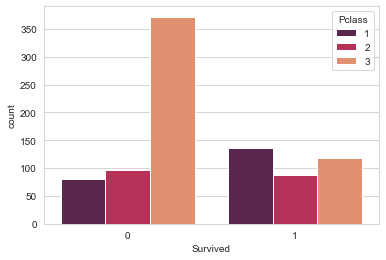

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rocket')

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

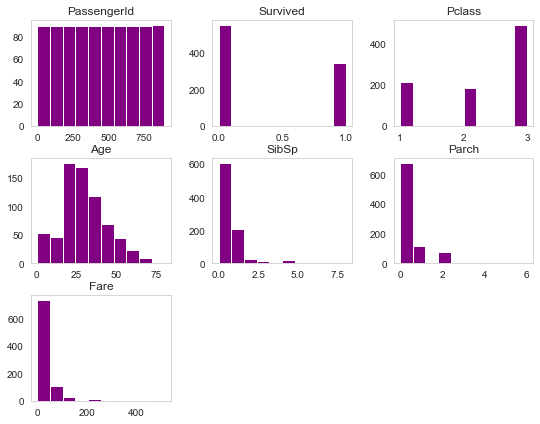

In [14]:
df.hist(bins=10,figsize=(9,7),grid=False,color='Purple')

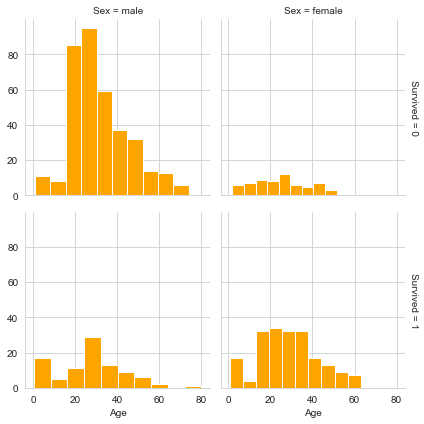

In [15]:
g = sns.FacetGrid(df, col="Sex", row="Survived", margin_titles=True)
g.map(plt.hist, "Age",color="orange");

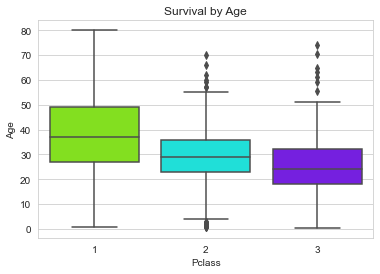

In [16]:
ax = sns.boxplot(x="Pclass", y="Age", data=df,palette='hsv')
plt.title("Survival by Age",fontsize=12);

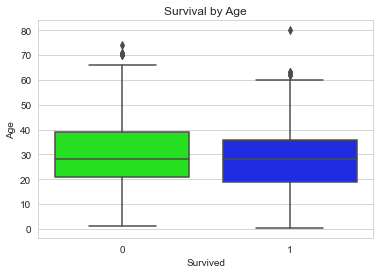

In [17]:
ax = sns.boxplot(x="Survived", y="Age", data=df,palette='hsv')
plt.title("Survival by Age",fontsize=12);

<AxesSubplot:>

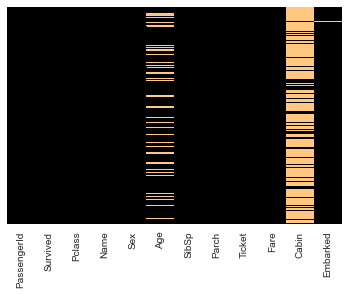

In [18]:
# Heatmap to know about missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='copper')

In [19]:
corr = df.corr()
a=corr.style.background_gradient(cmap='Oranges')
a

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Data Cleaning 

In [20]:
# Check for the null value
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
df[['Age','Cabin','Embarked']].isnull()

,Age,Cabin,Embarked
0,False,True,False
1,False,False,False
2,False,True,False
3,False,False,False
4,False,True,False
...,...,...,...
886,False,True,False
887,False,False,False
888,True,True,False
889,False,False,False


In [22]:
#DATA CLEANING : Imputing missing values in Age based Pclass (take average of age in Pclass)
df['Age'] = df['Age'].groupby([df['Pclass']]).apply(lambda x: x.fillna(x.mean()))

In [23]:
#DATA CLEANING : Dropping the Cabin Column
df.drop(['Cabin'], axis = 1,inplace = True)

In [24]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C


In [25]:
# For checking null value in Embarked column
df['Embarked'].isnull().value_counts()

False    889
True       2
Name: Embarked, dtype: int64

In [26]:
# DATA CLEANING : Dropping the row in Embarked column that is NaN.
df.dropna(axis=0,subset=['Embarked'],inplace=True)

In [27]:
# For checking null value in Embarked column is there or removed
df['Embarked'].isnull().value_counts()

False    889
Name: Embarked, dtype: int64

In [28]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C


In [29]:
# To check if any null values is left in the data frame 
df.isnull().value_counts()

PassengerId  Survived  Pclass  Name   Sex    Age    SibSp  Parch  Ticket  Fare   Embarked
False        False     False   False  False  False  False  False  False   False  False       889
dtype: int64

In [30]:
# Converting categorical features (Sex, Embark) to dummy variables using get_dummies
Sex=pd.get_dummies(df['Sex'],drop_first=True)
Embarked=pd.get_dummies(df['Embarked'],drop_first=True)

In [31]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [32]:
df=pd.concat([df,Sex,Embarked],axis=1)
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.00000,1,0,7.2500,1,0,1
1,2,1,1,38.00000,1,0,71.2833,0,0,0
2,3,1,3,26.00000,0,0,7.9250,0,0,1
3,4,1,1,35.00000,1,0,53.1000,0,0,1
4,5,0,3,35.00000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.00000,0,0,13.0000,1,0,1
887,888,1,1,19.00000,0,0,30.0000,0,0,1
888,889,0,3,25.14062,1,2,23.4500,0,0,1
889,890,1,1,26.00000,0,0,30.0000,1,0,0


Logistic Regression Model 

In [33]:
#Building a logistic regression model (by splitting the data in 70:30 ratio of train / testing)
# TRAINING AND PREDICTING : Predicting and evaluating the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [34]:
# lets consider our x variables
df.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [35]:
# lets consider our y variable
df['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [36]:
# splitting data in 70:30 ratio and giving value to x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), 
                                                    df['Survived'], test_size=0.30,random_state=11)

In [37]:
# 70% of 889 = 622 
x_train 

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
118,119,1,24.000000,0,1,247.5208,1,0,0
504,505,1,16.000000,0,0,86.5000,0,0,1
75,76,3,25.000000,0,0,7.6500,1,0,1
301,302,3,25.140620,2,0,23.2500,1,1,0
861,862,2,21.000000,1,0,11.5000,1,0,1
...,...,...,...,...,...,...,...,...,...
270,271,1,38.233441,0,0,31.0000,1,0,1
338,339,3,45.000000,0,0,8.0500,1,0,1
92,93,1,46.000000,1,0,61.1750,1,0,1
81,82,3,29.000000,0,0,9.5000,1,0,1


In [38]:
# 70% of 889 = 622 
y_train

118    0
504    1
75     0
301    1
861    0
      ..
270    0
338    1
92     0
81     1
704    0
Name: Survived, Length: 622, dtype: int64

In [39]:
model = LogisticRegression()

In [40]:
model.fit(x_train, y_train)

C:\Users\Saanvi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
# 30% of 889 = 267
x_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
432,433,2,42.000000,1,0,26.0000,0,0,1
672,673,2,70.000000,0,0,10.5000,1,0,1
527,528,1,38.233441,0,0,221.7792,1,0,1
823,824,3,27.000000,0,1,12.4750,0,0,1
665,666,2,32.000000,2,0,73.5000,1,0,1
...,...,...,...,...,...,...,...,...,...
89,90,3,24.000000,0,0,8.0500,1,0,1
549,550,2,8.000000,1,1,36.7500,1,0,1
445,446,1,4.000000,0,2,81.8583,1,0,1
241,242,3,25.140620,1,0,15.5000,0,1,0


Prediction and Evaluation

In [42]:
y_predicted = model.predict(x_test)
y_predicted

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [43]:
# Predicting the probabilities
model.predict_proba(x_test)

array([[0.28234304, 0.71765696],
       [0.82407665, 0.17592335],
       [0.13325607, 0.86674393],
       [0.36597379, 0.63402621],
       [0.67046676, 0.32953324],
       [0.82855689, 0.17144311],
       [0.48864544, 0.51135456],
       [0.01872067, 0.98127933],
       [0.11156311, 0.88843689],
       [0.88717724, 0.11282276],
       [0.53711693, 0.46288307],
       [0.8607718 , 0.1392282 ],
       [0.86957528, 0.13042472],
       [0.02265497, 0.97734503],
       [0.35795929, 0.64204071],
       [0.90204211, 0.09795789],
       [0.90211087, 0.09788913],
       [0.84098271, 0.15901729],
       [0.0820956 , 0.9179044 ],
       [0.87162247, 0.12837753],
       [0.67253899, 0.32746101],
       [0.54343549, 0.45656451],
       [0.84216484, 0.15783516],
       [0.90579277, 0.09420723],
       [0.84411031, 0.15588969],
       [0.91799644, 0.08200356],
       [0.86010561, 0.13989439],
       [0.61219966, 0.38780034],
       [0.75470755, 0.24529245],
       [0.91998123, 0.08001877],
       [0.

In [44]:
model.score(x_test,y_test)

0.8314606741573034

In [45]:
#Analyse Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [46]:
# Accuracy and Confusion matrix of the model  
cm=confusion_matrix(y_test,y_predicted)
cm

array([[142,  19],
       [ 26,  80]], dtype=int64)

In [47]:
#Checking the accuracy
accuracy_score(y_test, y_predicted)

0.8314606741573034

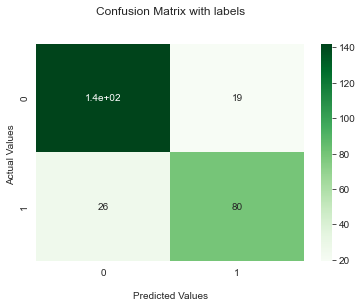

In [48]:
# now, visualize confusion matrix

ax = sns.heatmap(cm, annot=True, cmap='Greens')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


## Display the visualization of the Confusion Matrix.
plt.show()

In [49]:
# Classification Report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       161
           1       0.81      0.75      0.78       106

    accuracy                           0.83       267
   macro avg       0.83      0.82      0.82       267
weighted avg       0.83      0.83      0.83       267



In [50]:
# model.coef_ indicates value of m in y=m*x + b equation
model.coef_

array([[ 5.61535589e-04, -4.59559697e-01, -7.50959295e-03,
        -1.41214136e-01, -2.17957901e-01,  1.32525828e-02,
        -2.33738307e+00,  1.05462657e-01,  2.32992917e-01]])

In [51]:
# model.intercept_ indicates value of b in y=m*x + b equation
model.intercept_

array([1.48790036])

In [52]:
# SIGMOID Function 
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

#### COMPARING LOGISTIC REGRESSION MODEL WITH OTHER MODELS

##### KNN MODEL

In [53]:
from sklearn.neighbors import KNeighborsClassifier
KNNmodel =  KNeighborsClassifier()
KNNmodel.fit(x_train,y_train)
prediction_knn=model.predict(x_test)

In [54]:
KNNmodel.score(x_test,y_test)

0.6179775280898876

##### RANDOM FOREST

In [55]:
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier()
rfmodel.fit(x_train,y_train)
prediction_rf=model.predict(x_test)

In [56]:
rfmodel.score(x_test,y_test)

0.797752808988764

##### DESCISION TREE

In [57]:
from sklearn.tree import DecisionTreeClassifier
dtreemodel = DecisionTreeClassifier()
dtreemodel.fit(x_train,y_train)
prediction_dtree = dtreemodel.predict(x_test)

In [58]:
dtreemodel.score(x_test,y_test)

0.7902621722846442

In [59]:
allmodels = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN',
              'Random Forest','Descision Tree'],
    'Score': [model.score(x_test,y_test),KNNmodel.score(x_test,y_test),rfmodel.score(x_test,y_test),dtreemodel.score(x_test,y_test)]})

allmodels

,Model,Score
0,Logistic Regression,0.831461
1,KNN,0.617978
2,Random Forest,0.797753
3,Descision Tree,0.790262


# THE END